In [1]:
!pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset - replace filename if yours differs
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_2590.csv", skiprows=4)

# Preview first 5 rows
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [3]:
# See the column names
print(data.columns)

# Check number of rows and columns
print(data.shape)

# Check data types and non-null values
data.info()


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')
(266, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator N

In [7]:
# Filter the row for India
india_data = data[data['Country Name'] == 'India']

# Drop columns that are not years
india_years = india_data.drop(columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"])

# Transpose to get years as rows
india_years = india_years.T
india_years.index.name = 'Year'
india_years.reset_index(inplace=True)
india_years.columns = ['Year', 'Population']

# Filter only valid year rows (all digits)
india_years = india_years[india_years['Year'].str.isdigit()]

# Convert 'Year' to integer type
india_years['Year'] = india_years['Year'].astype(int)

# Convert Population to numeric (in case of missing or bad data)
india_years['Population'] = pd.to_numeric(india_years['Population'], errors='coerce')

# Drop any missing data
india_years.dropna(inplace=True)

# Preview cleaned data
india_years.head()


,Year,Population
0,1960,435990338.0
1,1961,446564729.0
2,1962,457283090.0
3,1963,468138575.0
4,1964,479229598.0


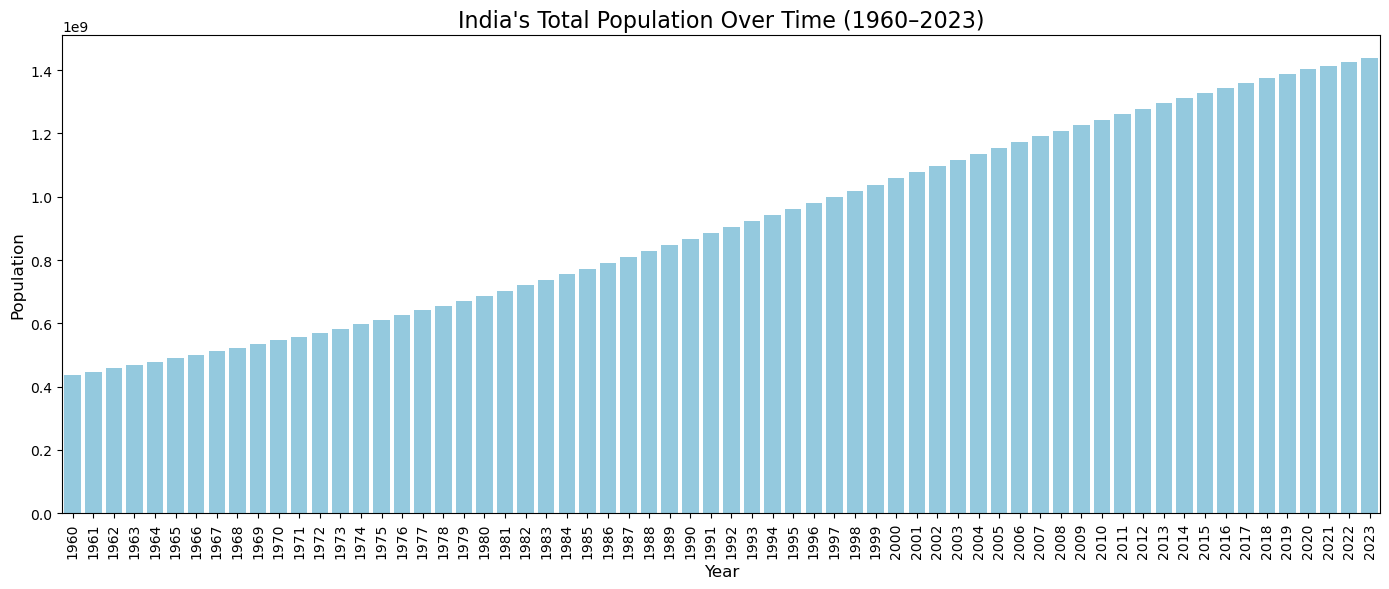

In [8]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Year', y='Population', data=india_years, color='skyblue')

plt.xticks(rotation=90)  # Rotate x labels
plt.title("India's Total Population Over Time (1960–2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.tight_layout()
plt.show()


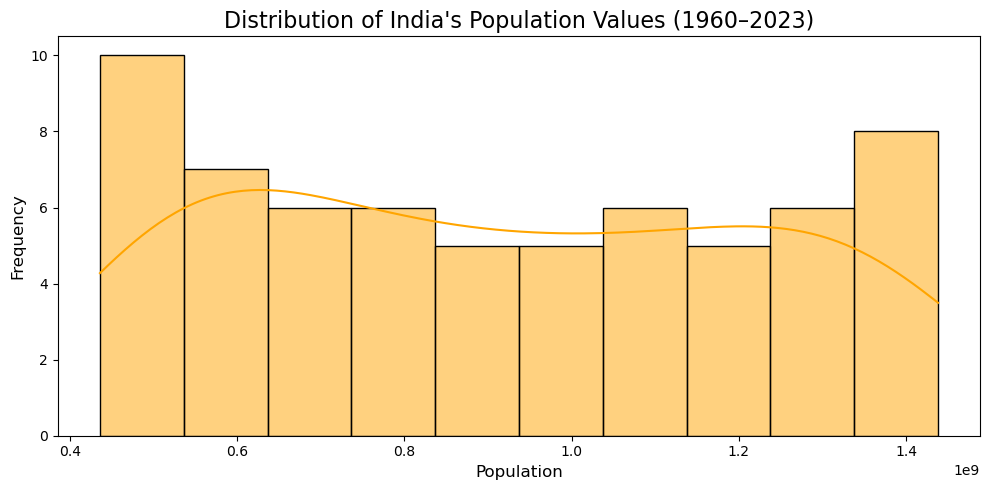

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(india_years['Population'], bins=10, kde=True, color='orange')

plt.title("Distribution of India's Population Values (1960–2023)", fontsize=16)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


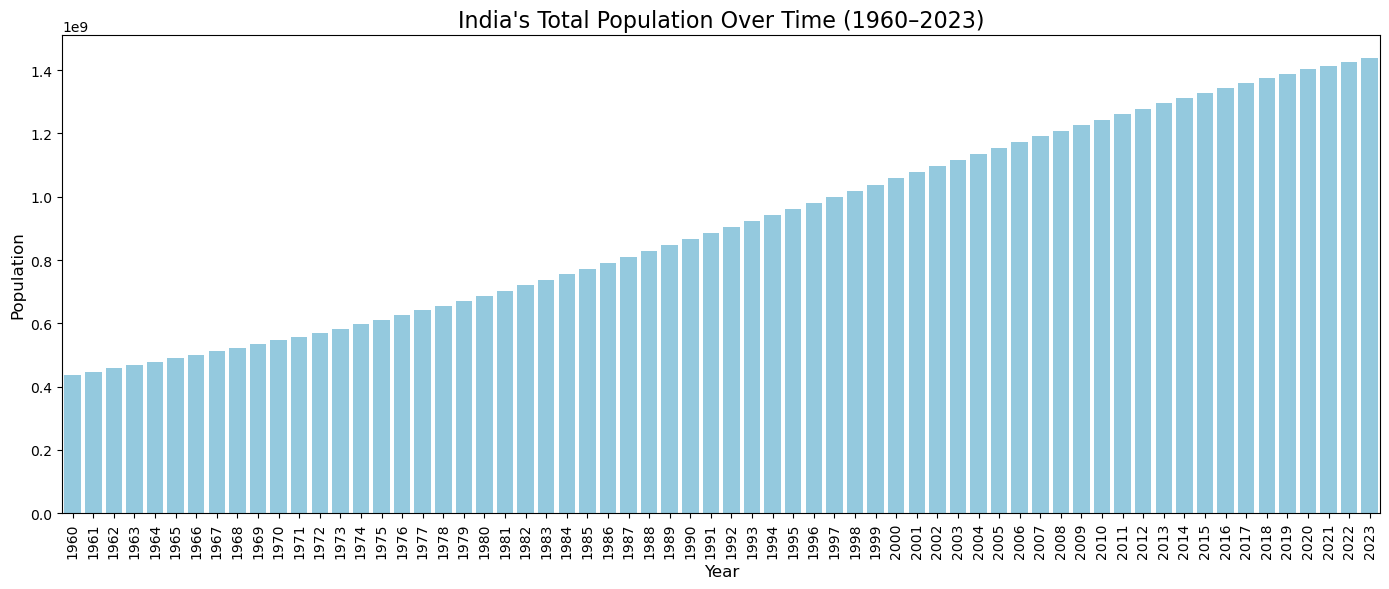

In [10]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Year', y='Population', data=india_years, color='skyblue')
plt.xticks(rotation=90)
plt.title("India's Total Population Over Time (1960–2023)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.tight_layout()

# Save it
plt.savefig("india_population_chart.png")
plt.show()
